In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.path as Path
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import AxesGrid

import os


%matplotlib

Using matplotlib backend: Qt5Agg


### Note changes in labeling convention in the finalized manuscript.

 $t$ or $T$ --> AP 
 
 $\delta_{tss}$ --> $g_{as}$ 
 
 $\delta_{bss}$ --> $g_{bs}$ 
 
 $\delta_{tbp}$ --> $g_{bap}$ 



![title](./NSMO_values_Updated/LandauEnergy.png)

![title](./NSMO_values_Updated/Values.png)

![title](./NSMO_values_updated/Decomp.png)

In [2]:
from matplotlib import colors,cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
Big = cm.get_cmap('RdGy', 512)
tmpcmap=Big(np.linspace(0.15, 0.85, 512))
#tmpcmap[-7:,:] = tmpcmap[-8,:]
newcmp = ListedColormap(tmpcmap)

### global variables, run first

In [3]:
alpha_t = -0.31
alpha_s =  0.17
alpha_b =  2.72
alpha_p =  0.88

beta_t =   0.28
beta_s =   1.01

tss=      -0.31
bss =     -2.14
btp =     -0.24

In [4]:
def landau(ss1,ss2, QQb, Qt=0.0, Qp=0.0, mul_tss=1.,mul_bss=1., mul_btp=1.):
    Qt_term=0.5*alpha_t*Qt**2. + 0.25*beta_t*Qt**4.
    ss_term = 0.5*alpha_s*(ss1**2.+ss2**2.) + 0.25*beta_s*(ss1**2.+ss2**2.)**2.
    Qb_term=0.5*alpha_b*QQb**2.
    Qp_term=0.5*alpha_p*Qp**2.
    
    coupling_1 = mul_tss*tss*Qt*ss1*ss2
    coupling_2 = mul_bss*bss*QQb*(ss1**2.-ss2**2.)
    coupling_3 = mul_btp*btp*QQb*Qt*Qp

    #return Qt_term + ss_term + Qb_term + coupling_1 +coupling_2
    return ss_term + Qb_term + Qt_term + coupling_1 + coupling_2 + coupling_3
    

### Amplitude of modes

In [22]:
Qb=0.17
Qt=1.23
Qp=0.05

In [23]:
x_lim =1.5
y_lim =1.0
s1,s2 = np.arange(-x_lim,x_lim,0.02), np.arange(-y_lim,y_lim,0.02)
ss1,ss2=np.meshgrid(s1,s2)

### Plot energy surfaces (Fig. S11)

In [24]:
energy = landau(ss1=ss1,ss2=ss2, QQb=Qb, Qt=Qt, Qp=Qp)

In [25]:
energy.min()

-0.14248007490000003

### Change multiplier to disable or enable a particular mode.  Uncomment desired situation.

In [44]:
### None
#mul_tss=0.
#mul_bss=0.
#mul_btp=0.

## Site-centered case
#mul_tss=0.
#mul_bss=1.
#mul_btp=0.

## Bond-centered case
#mul_tss=1.
#mul_bss=0.
#mul_btp=0.

### Intermediate phase
#mul_tss=1.
#mul_bss=1.
#mul_btp=1.




In [38]:
energy = landau(ss1=ss1,ss2=ss2, 
                QQb=Qb, 
                Qt=Qt, 
                Qp=Qp, 
                mul_tss=mul_tss,
                mul_bss=mul_bss, 
                mul_btp=mul_btp)

min_pos=np.where(np.abs(energy-energy.min())<0.00001)

In [39]:
ticklblx=np.linspace(-x_lim,x_lim,s1.size+1)
ticklbly=np.linspace(-y_lim,y_lim,s2.size+1)
tickerx=np.arange(0,s1.size+1)
tickery=np.arange(0,s2.size+1)

In [40]:
cbar_minmax=0.2

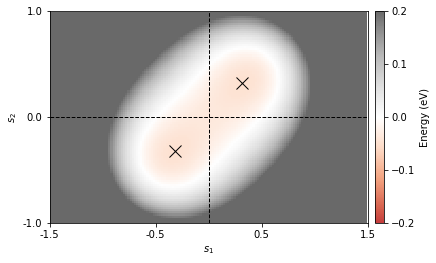

In [41]:
fig, ax =plt.subplots(1,1)
im=ax.imshow(energy, vmin=-cbar_minmax,vmax=cbar_minmax, cmap=newcmp)

# Ticks and limits
ax.set_xticks(tickerx[::50])
ax.set_xticklabels(ticklblx[::50])
ax.set_xlabel(r'$s_1$')
ax.set_yticks(tickery[::50])
ax.set_yticklabels(ticklbly[::50])
ax.set_ylabel(r'$s_2$')
ax.set_xlim(0, tickerx.size-1)
ax.set_ylim(0, tickery.size-1)
ax.grid('off')

# Grid
ax.plot(tickerx,0*tickerx+tickery.size//2,'k--',lw=1)
ax.plot(0*tickery+tickerx.size//2,tickery, 'k--',lw=1)

# Colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
#cax.set_yticks([-cbar_minmax,cbar_minmax])
cbar=fig.colorbar(im, cax=cax,ticks=[-cbar_minmax,-cbar_minmax/2,0,cbar_minmax/2, cbar_minmax])
#cbar.ax.set_yticklabels([-1,1])
cbar.ax.set_ylabel('Energy (eV)')


#ax.plot(197,75,'o')
#ax.plot(53,75,'o')

##Min energy
ax.plot(min_pos[1][0], min_pos[0][0],'kx',markersize=12, c='k')
try:
    ax.plot(min_pos[1][1], min_pos[0][1],'kx',markersize=12, c='k')
except IndexError:
    pass
#ax.plot(tickerx.size//2+tickerx.size//2-min_pos[1], tickery.size//2+tickery.size//2-min_pos[0],
#        'kx',markersize=8)

In [174]:
fig.savefig('./NSMO_values_Updated/Qb%d_Qt%d.pdf'%(mul_bss,mul_tss))

### Linecut for intermediate vs site-centered case (Fig. 4)

In [ ]:
mul_tss=0.
mul_bss=1.
mul_btp=0.

In [17]:
energy0 = landau(ss1=ss1,ss2=ss2, 
                QQb=Qb, 
                Qt=Qt, 
                Qp=Qp, 
                mul_tss=mul_tss,
                mul_bss=mul_bss, 
                mul_btp=mul_btp)

min_pos0=np.where(np.abs(energy0-energy0.min())<0.00001)

In [18]:
mul_tss=1.
mul_bss=1.
mul_btp=1.

In [19]:
energy1 = landau(ss1=ss1,ss2=ss2, 
                QQb=Qb, 
                Qt=Qt, 
                Qp=Qp, 
                mul_tss=mul_tss,
                mul_bss=mul_bss, 
                mul_btp=mul_btp)

min_pos1=np.where(np.abs(energy1-energy1.min())<0.00001)

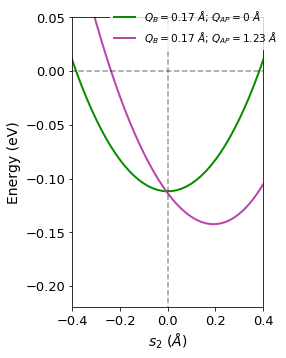

In [20]:
fig, ax = plt.subplots(1,1, figsize=(4,5))

ax.plot(ticklbly[:-1],energy0[:,min_pos0[1][1]],c='#058d00ff', lw=2,
        label=r'$Q_{B} = %.2f$ $\AA$; $Q_{AP}=0$ $\AA$' %Qb)

ax.plot(ticklbly[:-1],energy1[:,min_pos1[1][1]],c='#b946a8ff', lw=2,
        label=r'$Q_{B} = %.2f$ $\AA$; $Q_{AP}= %.2f$ $\AA$' %(Qb,Qt))

ax.plot(ticklbly[:-1],0*ticklbly[:-1],'k--',alpha=0.4)
ax.plot(0*ticklbly[:-1],ticklbly[:-1],'k--',alpha=0.4)
ax.set_xticks([-0.4,-0.2, 0., .2, 0.4])
ax.set_xlabel(r'$s_{2} \ (\AA)$',fontsize=14)
ax.set_ylabel('Energy (eV)',fontsize=14)
ax.set_xlim(-0.4,0.4)
ax.set_ylim(-0.22,.05)
ax.tick_params(axis='both', which='major', labelsize=13)
#ax.text(-0.67,-0.52,r'$\Delta E$ = %.0f meV' %(1000*energy1.min()-1000*energy0.min())) 
fig.legend(loc='upper right', fontsize=10.5,edgecolor='None')
fig.tight_layout()


In [212]:
fig.savefig('./NSMO_values_Updated/Linecut.pdf')


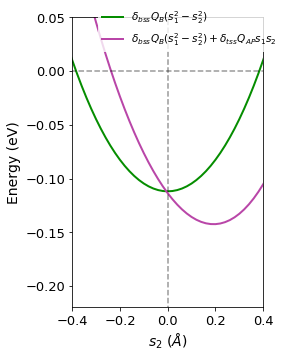

In [21]:
fig, ax = plt.subplots(1,1, figsize=(4,5))

ax.plot(ticklbly[:-1],energy0[:,min_pos0[1][1]],c='#058d00ff', lw=2,
        label=r'$\delta_{bss}Q_{B}(s_1^2-s_2^2)$')

ax.plot(ticklbly[:-1],energy1[:,min_pos1[1][1]],c='#b946a8ff', lw=2,
        label=r'$\delta_{bss}Q_{B}(s_1^2-s_2^2) + \delta_{tss}Q_{AP}s_1s_2$')

ax.plot(ticklbly[:-1],0*ticklbly[:-1],'k--',alpha=0.4)
ax.plot(0*ticklbly[:-1],ticklbly[:-1],'k--',alpha=0.4)
ax.set_xticks([-0.4,-0.2, 0., .2, 0.4])
ax.set_xlabel(r'$s_{2} \ (\AA)$',fontsize=14)
ax.set_ylabel('Energy (eV)',fontsize=14)
ax.set_xlim(-0.4,0.4)
ax.set_ylim(-0.22,.05)
ax.tick_params(axis='both', which='major', labelsize=13)
#ax.text(-0.67,-0.52,r'$\Delta E$ = %.0f meV' %(1000*energy1.min()-1000*energy0.min())) 
fig.legend(loc='upper right', fontsize=10.5,edgecolor='None')
fig.tight_layout()


In [217]:
fig.savefig('./NSMO_values_Updated/Linecut_Legend_Energy.pdf')
